https://github.com/gabrieldeandradebianco/aula_sql/
https://colab.research.google.com/drive/18tZyG3np5GiW_z5CEyzt1MaISdcFvCK4?usp=sharing

# **Introdução ao SQL**

* Structured Query Language
* É a linguagem usada para acessar e manipular bancos de dados (MySQL, SQL Server, MS Access, Postgre)


# Criando e inserindo dados em uma tabela

**Criando uma nova tabela**

O comando "create table" cria uma tabela nova no banco de dados com as colunas especificadas.

**`create table nome_da_tabela (coluna1 tipo, coluna2 tipo ...);`**

*Obs.: Para garantirmos que a tabela será criada sem nenhum valor, vamos primeiro executar o comando "drop table".*

In [1]:
import sqlite3

# conecta no banco de dados (caso ele não exista, vai ser criado um novo banco com esse nome)
conn = sqlite3.connect('teste.db')
print("Opened database successfully");

# comando SQL para deletar uma tabela, caso ela já exista
sql = "DROP TABLE IF EXISTS pessoas"
# executa o comando
conn.execute(sql)

# comando SQL para criar uma nova tabela, caso ela não exista
sql = "CREATE TABLE IF NOT EXISTS pessoas(nome text, nacionalidade text, idade integer)" 
# executa o comando
conn.execute(sql)

# salva as mudanças (sem esse comando as mudanças serão desfeitas quando fecharmos a conexão)
conn.commit()
print("Table created successfully");

# se não quisermos fazer mais nada, fechamos a conexão
conn.close()

Opened database successfully
Table created successfully


In [2]:
# vamos criar mais uma tabela
conn = sqlite3.connect('teste.db')
sql = "DROP TABLE IF EXISTS pets"
conn.execute(sql)

sql = "CREATE TABLE IF NOT EXISTS pets(nome text, dono text, especie text, sexo text)" 
# executa o comando
conn.execute(sql)

# salva as mudanças (sem esse comando as mudanças serão desfeitas quando fecharmos a conexão)
conn.commit()
print("Table created successfully");

# se não quisermos fazer mais nada, fechamos a conexão
conn.close()

Table created successfully


**Inserindo novos valores**

Use "INSERT INTO" para adicionar novas linhas em uma tabela.

**`insert into nome_da_tabela (valor1, valor2, valor3, ...);`**

Podemos inserir múltiplos valores de uma vez (Bulk Insert) da seguinte forma:

**`insert into nome_da_tabela (lista_de_valores_1), (lista_de_valores_2), ...;`**

In [3]:
# reabre a conexão
conn = sqlite3.connect('teste.db')

# inserindo valores
conn.execute("INSERT INTO pessoas VALUES('Emilia', 'Espanha', 53)")
conn.execute("INSERT INTO pessoas VALUES('Rodrigo', 'Brasil', 37)")
conn.execute("INSERT INTO pessoas VALUES('Peter', 'Inglaterra', 35)")
conn.execute("INSERT INTO pessoas VALUES('Marta', 'Brasil', 32)")
conn.execute("INSERT INTO pessoas VALUES('Marta', 'Brasil', 35)")
conn.execute("INSERT INTO pessoas VALUES('Manoel', 'Portugal', 42)")

# podemos inserir vários valores em um único comando também, da seguinte maneira
sql = '''INSERT INTO pets VALUES
        ('Scooby', 'Emilia', 'Cachorro', 'Macho'),
        ('Dorothy', 'Emilia', 'Cachorro', 'Fêmea'),
        ('Petite', 'Rodrigo', 'Gato', 'Fêmea'),
        ('Niko', 'Rodrigo', 'Gato', 'Macho'),
        ('Cissa', 'Peter', 'Gato', 'Fêmea'),
        ('Paco', 'Peter', 'Cachorro', 'Macho'),
        ('Mingau', 'Manoel', 'Gato', 'Macho')'''
conn.execute(sql)
conn.commit()

**Modificando / atualizando dados**

Caso precisemos de modificar dados podemos usar o comando UPDATE.

`UPDATE nome_tabela SET coluna = novo_valor WHERE condição`

In [4]:
# atualizando/modificando valores
conn.execute("UPDATE pessoas SET idade = 56 WHERE nome = 'Emilia'")
conn.commit()

**Deletando dados**

Para deletar dados, usamos sintaxe parecida.

`DELETE FROM nome_tabela WHERE condição`

In [5]:
# deletando
conn.execute("DELETE FROM pessoas WHERE nome = 'Manoel'")
conn.commit()

# Select

O comando SELECT permite realizarmos pesquisas em uma ou mais tabelas.

**Selecionando todos os dados da tabela**

Usando "SELECT * FROM" podemos selecionar todas os valores em uma tabela.

**`select * from nome_da_tabela`**

In [6]:
sql = "SELECT * from pessoas"

# o comando execute retorna um objeto "cursor", que contém as linhas do resultados
cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)
('Rodrigo', 'Brasil', 37)
('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 32)
('Marta', 'Brasil', 35)


**Selecionando colunas específicas de uma tabela**

Podemos especificar somente as colunas desejadas no nosso "SELECT":

**`select coluna, outra_coluna, ..., FROM nome_da_tabela`**

In [7]:
sql = "SELECT idade, nome FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

(56, 'Emilia')
(37, 'Rodrigo')
(35, 'Peter')
(32, 'Marta')
(35, 'Marta')


**Selecionando valores distintos de uma tabela**

Usando a palavra chave DISTINCT, os valores duplicados não são selecionados.

**`select DISTINCT coluna, outra_coluna, ..., FROM nome_da_tabela`**

In [8]:
sql = "SELECT DISTINCT * FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)
('Rodrigo', 'Brasil', 37)
('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 32)
('Marta', 'Brasil', 35)


In [9]:
sql = "SELECT DISTINCT nacionalidade FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Espanha',)
('Brasil',)
('Inglaterra',)


In [10]:
sql = "SELECT DISTINCT nome, nacionalidade FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha')
('Rodrigo', 'Brasil')
('Peter', 'Inglaterra')
('Marta', 'Brasil')


**Obtendo o número de colunas de uma pesquisa**

Para obter o número de colunas, use COUNT (...).

**`select COUNT(*) FROM nome_da_tabela`**

In [11]:
sql = "SELECT COUNT (*) FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

(5,)


In [12]:
sql = "SELECT COUNT (DISTINCT nacionalidade) FROM pessoas"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

(3,)


**Como buscar dados específicos (pesquisa condicional)**

A palavra chave WHERE pode ser usada para especificar quais resultados queremos.

**`select * FROM nome_da_tabela WHERE condição`**

Operadores condicionais:

`=`    igual

`<`		 menor que

`>`    maior que 

`<>`   diferente

`IN (a, b, c)` Valor está incluso na lista

`BETWEEN x AND y`	Valor entre x e y

`LIKE "%"`	Texto corresponde ao padrão especificado

In [13]:
sql = "SELECT * FROM pessoas WHERE idade > 35"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)
('Rodrigo', 'Brasil', 37)


In [14]:
sql = "SELECT * FROM pessoas WHERE idade <> 35 AND nacionalidade = 'Brasil'"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Rodrigo', 'Brasil', 37)
('Marta', 'Brasil', 32)


In [15]:
sql = "SELECT * FROM pessoas WHERE idade == 35 OR nacionalidade = 'Espanha' "

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)
('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 35)


In [33]:
# pesquisa por todos com nacionalidade na lista
sql = "SELECT * FROM pessoas WHERE nacionalidade IN ('Espanha', 'França', 'Japão')"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)


In [37]:
# pesquisa por todos com idade entre 32 e 35 anos
sql = "SELECT * FROM pessoas WHERE idade BETWEEN 32 AND 35"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 32)
('Marta', 'Brasil', 35)


**Pesquisa usando wildcards (coringas)**

A palavra chave LIKE pode ser usada dentro da condição de uma expressão WHERE para pesquisa de valores que correspondam a um padrão, usando alguns wildcards.

O sinal de porcento (%) corresponde a zero, um ou múltiplos caracteres quaisquer.

O sinal de sublinhado/underline (_) representa um único caractere qualquer.

In [16]:
# pesquisa por todas as nacionalidades que terminem em 'a'
sql = "SELECT * FROM pessoas WHERE nacionalidade LIKE '%a' "

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Emilia', 'Espanha', 56)
('Peter', 'Inglaterra', 35)


In [17]:
# pesquisa por todos com nomes que contenham 't'
sql = "SELECT * FROM pessoas WHERE nome LIKE '%t%'"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 32)
('Marta', 'Brasil', 35)


In [18]:
# pesquisa por todos com nomes cuja terceira letra seja 't'
sql = "SELECT * FROM pessoas WHERE nome LIKE '__t%'"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Peter', 'Inglaterra', 35)


**Ordenando os resultados**

Podemos usar `ORDER BY` para ordernar uma pesquisa.

**`select * FROM nome_da_tabela ORDER BY coluna`**

Por padrão, os resultados são ordernados em ordem ascendente. Caso queira os resultados em ordem descendente, adicione `DESC` após o nome da coluna.

In [19]:
# ordena pela idade
sql = "SELECT * FROM pessoas WHERE nome LIKE '%t%' ORDER BY idade "

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Marta', 'Brasil', 32)
('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 35)


In [20]:
# ordena pela idade, descendente
sql = "SELECT * FROM pessoas WHERE nome LIKE '%t%' ORDER BY idade DESC"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 35)
('Marta', 'Brasil', 32)


In [21]:
# ordena pela idade, descendente; como segundo critério de ordenação usa o nome
sql = "SELECT * FROM pessoas WHERE nome LIKE '%t%' ORDER BY idade DESC, nome"

cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Marta', 'Brasil', 35)
('Peter', 'Inglaterra', 35)
('Marta', 'Brasil', 32)


# **Fazendo associações entre tabelas (JOIN)**

Usando a palavra-chave `JOIN`, podemos associar dados entre colunas. 

**`FROM primeira_tabela JOIN segunda_tabela ON (condição_de_associação)`**

Existem vários tipos de JOIN: Inner, Left, Right e Full.

**[Inner] Join**:

É o padrão. O resultado será as linhas em comum nas duas tabelas, conforme a associação especificada.

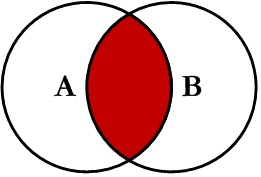

**Left [Outer] Join**:

Nas pesquisas com `LEFT OUTER JOIN`, o resultado será todos os registros que estejam na tabela antes (à esquerda) do JOIN, mesmo que não existam registros correspondentes na tabela à direita do JOIN.

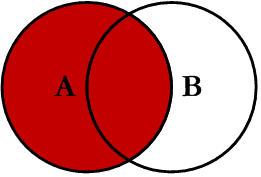

**Right [Outer] Join**:

O oposto do Left.

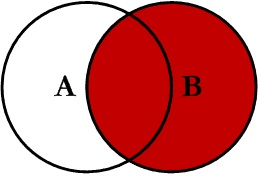

**Full [Outer] Join / Full Join / Outer Join**:

O Full Outer Join, gera como resultado todos os registros das duas tabelas.

In [22]:
# mostra todos os valores da tabela pets
sql = "SELECT * FROM pets"
cursor = conn.execute(sql)
for row in cursor:
  print(row)

('Scooby', 'Emilia', 'Cachorro', 'Macho')
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea')
('Petite', 'Rodrigo', 'Gato', 'Fêmea')
('Niko', 'Rodrigo', 'Gato', 'Macho')
('Cissa', 'Peter', 'Gato', 'Fêmea')
('Paco', 'Peter', 'Cachorro', 'Macho')
('Mingau', 'Manoel', 'Gato', 'Macho')


In [23]:
# INNER JOIN (sem condição ON)
sql = "SELECT * FROM pets INNER JOIN pessoas"
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['nome', 'dono', 'especie', 'sexo', 'nome', 'nacionalidade', 'idade']
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Emilia', 'Espanha', 56)
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Rodrigo', 'Brasil', 37)
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Peter', 'Inglaterra', 35)
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Marta', 'Brasil', 32)
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Marta', 'Brasil', 35)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Emilia', 'Espanha', 56)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Rodrigo', 'Brasil', 37)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Peter', 'Inglaterra', 35)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Marta', 'Brasil', 32)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Marta', 'Brasil', 35)
('Petite', 'Rodrigo', 'Gato', 'Fêmea', 'Emilia', 'Espanha', 56)
('Petite', 'Rodrigo', 'Gato', 'Fêmea', 'Rodrigo', 'Brasil', 37)
('Petite', 'Rodrigo', 'Gato', 'Fêmea', 'Peter', 'Inglaterra', 35)
('Petite', 'Rodrigo', 'Gato', 'Fêmea', 'Marta', 'Brasil', 32)
('P

In [24]:
# INNER JOIN
sql = "SELECT * FROM pets INNER JOIN pessoas ON pets.dono = pessoas.nome"
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['nome', 'dono', 'especie', 'sexo', 'nome', 'nacionalidade', 'idade']
('Scooby', 'Emilia', 'Cachorro', 'Macho', 'Emilia', 'Espanha', 56)
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea', 'Emilia', 'Espanha', 56)
('Petite', 'Rodrigo', 'Gato', 'Fêmea', 'Rodrigo', 'Brasil', 37)
('Niko', 'Rodrigo', 'Gato', 'Macho', 'Rodrigo', 'Brasil', 37)
('Cissa', 'Peter', 'Gato', 'Fêmea', 'Peter', 'Inglaterra', 35)
('Paco', 'Peter', 'Cachorro', 'Macho', 'Peter', 'Inglaterra', 35)


In [25]:
# organizando melhor os resultados
sql = '''SELECT p.nome, dono, especie, sexo
         FROM pets AS p
         INNER JOIN pessoas 
         ON p.dono = pessoas.nome'''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['nome', 'dono', 'especie', 'sexo']
('Scooby', 'Emilia', 'Cachorro', 'Macho')
('Dorothy', 'Emilia', 'Cachorro', 'Fêmea')
('Petite', 'Rodrigo', 'Gato', 'Fêmea')
('Niko', 'Rodrigo', 'Gato', 'Macho')
('Cissa', 'Peter', 'Gato', 'Fêmea')
('Paco', 'Peter', 'Cachorro', 'Macho')


In [26]:
# LEFT OUTER JOIN
sql = '''SELECT p.nome as nome_do_pet, dono, pessoas.nome as nome_da_pessoa, especie, sexo
         FROM pets AS p
         LEFT OUTER JOIN pessoas 
         ON p.dono = pessoas.nome'''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['nome_do_pet', 'dono', 'nome_da_pessoa', 'especie', 'sexo']
('Scooby', 'Emilia', 'Emilia', 'Cachorro', 'Macho')
('Dorothy', 'Emilia', 'Emilia', 'Cachorro', 'Fêmea')
('Petite', 'Rodrigo', 'Rodrigo', 'Gato', 'Fêmea')
('Niko', 'Rodrigo', 'Rodrigo', 'Gato', 'Macho')
('Cissa', 'Peter', 'Peter', 'Gato', 'Fêmea')
('Paco', 'Peter', 'Peter', 'Cachorro', 'Macho')
('Mingau', 'Manoel', None, 'Gato', 'Macho')


In [29]:
# RIGHT OUTER JOIN
sql = '''SELECT p.nome as nome_do_pet, dono, pessoas.nome as nome_da_pessoa, especie, sexo
         FROM pets AS p
         RIGHT OUTER JOIN pessoas 
         ON p.dono = pessoas.nome'''

# SQLite3 não suporta RIGHT JOIN ou FULL OUTER JOIN
# vamos simular um right join, mudando a ordem das tabelas
sql = '''SELECT p.nome as nome_do_pet, dono, pessoas.nome as nome_da_pessoa, especie, sexo
         FROM pessoas
         LEFT OUTER JOIN pets as p 
         ON p.dono = pessoas.nome'''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)


['nome_do_pet', 'dono', 'nome_da_pessoa', 'especie', 'sexo']
('Dorothy', 'Emilia', 'Emilia', 'Cachorro', 'Fêmea')
('Scooby', 'Emilia', 'Emilia', 'Cachorro', 'Macho')
('Niko', 'Rodrigo', 'Rodrigo', 'Gato', 'Macho')
('Petite', 'Rodrigo', 'Rodrigo', 'Gato', 'Fêmea')
('Cissa', 'Peter', 'Peter', 'Gato', 'Fêmea')
('Paco', 'Peter', 'Peter', 'Cachorro', 'Macho')
(None, None, 'Marta', None, None)
(None, None, 'Marta', None, None)


**Agrupando os resultados**

Podemos agrupar os dados com valores iguais usando a expressão `GROUP BY`'

**`select COUNT(colunas) FROM tabela GROUP BY outra_coluna`**

In [42]:
# agrupa por 'dono' e conta quantas vezes cada um aparece na tabela pets 
sql = '''SELECT COUNT(*) as n, dono
         FROM pets
         GROUP BY dono order by n desc
      '''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['n', 'dono']
(2, 'Emilia')
(2, 'Peter')
(2, 'Rodrigo')
(1, 'Manoel')


In [48]:
# INNER JOIN com GROUP BY
sql = '''SELECT COUNT(*) as n, especie
         FROM pets
         INNER JOIN pessoas 
         ON pets.dono = pessoas.nome
         GROUP BY especie'''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['n', 'especie']
(3, 'Cachorro')
(3, 'Gato')


In [51]:
# idade maxima
sql = '''SELECT MAX(idade) as idade_maxima
         FROM pessoas
      '''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['idade_maxima']
(56,)


In [55]:
# idade média
sql = '''SELECT AVG(idade) as media
         FROM pessoas
      '''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['media']
(39.0,)


In [87]:
# WHERE não pode ser usado para valores agregados (COUNT, por exemplo)
# nesses casos, devemos usar uma expressão 'HAVING', após o GROUP BY 
sql = '''SELECT COUNT(*) as n, dono
         FROM pets where especie = 'Cachorro'
         GROUP BY dono
         HAVING n >= 2
         '''
cursor = conn.execute(sql)
column_names = [d[0] for d in cursor.description]
print(column_names)
for row in cursor:
  print(row)

['n', 'dono']
(2, 'Emilia')


Referências:

https://sqlbolt.com/

https://www.w3schools.com/sql/default.asp

https://devmedia.com.br/sql-join-entenda-como-funciona-o-retorno-dos-dados/31006


# Sandbox

Use esse link https://codehs.com/sandbox/id/sql-O2QmK4 para executar algumas das expressões usadas na aula e crias as suas próprias.
